In [14]:
#import libraries
import pandas as pd;
import geopandas as gpd;
import matplotlib.pyplot as plt;
import numpy as np; #Using numpy for regex
import pgeocode; #Used to convert postcodes to locations
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
pd.set_option('display.precision', 1)


import traveltimepy as ttpy
import os
from datetime import datetime #for examples
#TODO: store credentials in an environment variable
os.environ["TRAVELTIME_ID"] = '466b4c75'
os.environ["TRAVELTIME_KEY"] = 'aa473fed8d8638f1b576305a7e1fc019'

In [15]:
#Load ONE Data
df = pd.read_excel(r'one_data.xlsx', sheet_name='Sheet1')
df.head(20)

,Town,Units
0,Accrington,59
1,Alnwick,10
2,Altrincham,30
3,Ashton-Under-Lyne,38
4,Bacup,3
5,Bakewell,2
6,Barnsley,75
7,Barton Upon Humber,1
8,Batley,67
9,Beverley,48


In [16]:
#Set up Freightliner locations
data = [['FL Leeds', 53.7496, -1.5494], ['FL Doncaster', 53.497, -1.1821]]
  
# Create the pandas DataFrame
fl_locations = pd.DataFrame(data, columns=['Terminal', 'Lat', 'Long'])  

# print dataframe.
fl_locations

# creating a geometry column 
geometry = [Point(xy) for xy in zip(fl_locations['Long'], fl_locations['Lat'])]
# Coordinate reference system : WGS84
#crs = {'init': 'epsg:4326'}
crs = 'epsg:4326'
# Creating a Geographic data frame 
fl_points = gpd.GeoDataFrame(fl_locations, crs=crs, geometry=geometry)

indexed_fl_points = fl_points.set_index('Terminal')
fl_points

,Terminal,Lat,Long,geometry
0,FL Leeds,53.7,-1.5,POINT (-1.54940 53.74960)
1,FL Doncaster,53.5,-1.2,POINT (-1.18210 53.49700)


In [17]:
from functools import partial
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Address_Lookup")

location = geolocator.geocode("Leeds")
location

Location(Leeds, West Yorkshire, England, United Kingdom, (53.7974185, -1.5437941, 0.0))

In [18]:
df['searchstr'] = df['Town'].astype(str) + ',UK' 
df['geocode'] = df['searchstr'].apply(geolocator.geocode)

KeyboardInterrupt: 

In [ ]:
df['latitude'] = [g.latitude for g in df.geocode]
df['longitude'] = [g.longitude for g in df.geocode]
df['address'] = [g.address for g in df.geocode]
df

,Town,Units,searchstr,geocode,latitude,longitude,address
0,Accrington,59,"Accrington,UK","(Accrington, Hyndburn, Lancashire, England, BB...",53.8,-2.4,"Accrington, Hyndburn, Lancashire, England, BB5..."
1,Alnwick,10,"Alnwick,UK","(Alnwick, Northumberland, North of Tyne, Engla...",55.4,-1.7,"Alnwick, Northumberland, North of Tyne, Englan..."
2,Altrincham,30,"Altrincham,UK","(Altrincham, Trafford, Greater Manchester, Eng...",53.4,-2.4,"Altrincham, Trafford, Greater Manchester, Engl..."
3,Ashton-Under-Lyne,38,"Ashton-Under-Lyne,UK","(Ashton-under-Lyne, Tameside, Greater Manchest...",53.5,-2.1,"Ashton-under-Lyne, Tameside, Greater Mancheste..."
4,Bacup,3,"Bacup,UK","(Bacup, Manor Street, Rockliffe, Bacup, Rossen...",53.7,-2.2,"Bacup, Manor Street, Rockliffe, Bacup, Rossend..."
...,...,...,...,...,...,...,...
181,Wirral,47,"Wirral,UK","(Wirral, Liverpool City Region, England, Unite...",53.3,-3.1,"Wirral, Liverpool City Region, England, United..."
182,Workington,1,"Workington,UK","(Workington, Allerdale, Cumbria, England, Unit...",54.6,-3.5,"Workington, Allerdale, Cumbria, England, Unite..."
183,Worksop,24,"Worksop,UK","(Worksop, Bassetlaw, Nottinghamshire, England,...",53.3,-1.1,"Worksop, Bassetlaw, Nottinghamshire, England, ..."
184,Wrexham,387,"Wrexham,UK","(Wrexham, Cymru / Wales, LL11 1AP, United King...",53.0,-3.0,"Wrexham, Cymru / Wales, LL11 1AP, United Kingdom"


In [ ]:
df['postcode'] = df['address'].str.extract(r'([A-Z]{1,2}[0-9][A-Z0-9]? [0-9][ABD-HJLNP-UW-Z]{2})')
df

,Town,Units,searchstr,geocode,latitude,longitude,address,postcode
0,Accrington,59,"Accrington,UK","(Accrington, Hyndburn, Lancashire, England, BB...",53.8,-2.4,"Accrington, Hyndburn, Lancashire, England, BB5...",BB5 1EX
1,Alnwick,10,"Alnwick,UK","(Alnwick, Northumberland, North of Tyne, Engla...",55.4,-1.7,"Alnwick, Northumberland, North of Tyne, Englan...",NaN
2,Altrincham,30,"Altrincham,UK","(Altrincham, Trafford, Greater Manchester, Eng...",53.4,-2.4,"Altrincham, Trafford, Greater Manchester, Engl...",WA14 2DW
3,Ashton-Under-Lyne,38,"Ashton-Under-Lyne,UK","(Ashton-under-Lyne, Tameside, Greater Manchest...",53.5,-2.1,"Ashton-under-Lyne, Tameside, Greater Mancheste...",OL6 7SJ
4,Bacup,3,"Bacup,UK","(Bacup, Manor Street, Rockliffe, Bacup, Rossen...",53.7,-2.2,"Bacup, Manor Street, Rockliffe, Bacup, Rossend...",OL13 0DS
...,...,...,...,...,...,...,...,...
181,Wirral,47,"Wirral,UK","(Wirral, Liverpool City Region, England, Unite...",53.3,-3.1,"Wirral, Liverpool City Region, England, United...",NaN
182,Workington,1,"Workington,UK","(Workington, Allerdale, Cumbria, England, Unit...",54.6,-3.5,"Workington, Allerdale, Cumbria, England, Unite...",NaN
183,Worksop,24,"Worksop,UK","(Worksop, Bassetlaw, Nottinghamshire, England,...",53.3,-1.1,"Worksop, Bassetlaw, Nottinghamshire, England, ...",S80 1JQ
184,Wrexham,387,"Wrexham,UK","(Wrexham, Cymru / Wales, LL11 1AP, United King...",53.0,-3.0,"Wrexham, Cymru / Wales, LL11 1AP, United Kingdom",LL11 1AP


In [ ]:
r = geolocator.reverse((55.413488, -1.707310))
print(r.raw['address']['postcode'])

NE66 1HX


In [ ]:
df['coords'] = list(zip(df.latitude, df.longitude))
df

,Town,Units,searchstr,geocode,latitude,longitude,address,postcode,coords
0,Accrington,59,"Accrington,UK","(Accrington, Hyndburn, Lancashire, England, BB...",53.8,-2.4,"Accrington, Hyndburn, Lancashire, England, BB5...",BB5 1EX,"(53.7541156, -2.3655434)"
1,Alnwick,10,"Alnwick,UK","(Alnwick, Northumberland, North of Tyne, Engla...",55.4,-1.7,"Alnwick, Northumberland, North of Tyne, Englan...",NaN,"(55.4134875, -1.7073105)"
2,Altrincham,30,"Altrincham,UK","(Altrincham, Trafford, Greater Manchester, Eng...",53.4,-2.4,"Altrincham, Trafford, Greater Manchester, Engl...",WA14 2DW,"(53.3839662, -2.3525463)"
3,Ashton-Under-Lyne,38,"Ashton-Under-Lyne,UK","(Ashton-under-Lyne, Tameside, Greater Manchest...",53.5,-2.1,"Ashton-under-Lyne, Tameside, Greater Mancheste...",OL6 7SJ,"(53.4865407, -2.098691)"
4,Bacup,3,"Bacup,UK","(Bacup, Manor Street, Rockliffe, Bacup, Rossen...",53.7,-2.2,"Bacup, Manor Street, Rockliffe, Bacup, Rossend...",OL13 0DS,"(53.6975234, -2.2004698)"
...,...,...,...,...,...,...,...,...,...
181,Wirral,47,"Wirral,UK","(Wirral, Liverpool City Region, England, Unite...",53.3,-3.1,"Wirral, Liverpool City Region, England, United...",NaN,"(53.3409714, -3.0500916)"
182,Workington,1,"Workington,UK","(Workington, Allerdale, Cumbria, England, Unit...",54.6,-3.5,"Workington, Allerdale, Cumbria, England, Unite...",NaN,"(54.6415716, -3.5459287)"
183,Worksop,24,"Worksop,UK","(Worksop, Bassetlaw, Nottinghamshire, England,...",53.3,-1.1,"Worksop, Bassetlaw, Nottinghamshire, England, ...",S80 1JQ,"(53.3042362, -1.1246168)"
184,Wrexham,387,"Wrexham,UK","(Wrexham, Cymru / Wales, LL11 1AP, United King...",53.0,-3.0,"Wrexham, Cymru / Wales, LL11 1AP, United Kingdom",LL11 1AP,"(53.0465084, -2.9937869)"


In [ ]:
df['reverse_geocode'] = df.coords.apply(geolocator.reverse)
df

KeyboardInterrupt: 

In [ ]:
df['data'] = df['reverse_geocode'].apply(lambda x: x.raw['address'])
df

,Town,Units,searchstr,geocode,latitude,longitude,address,postcode,coords,reverse_geocode,data
0,Accrington,59,"Accrington,UK","(Accrington, Hyndburn, Lancashire, England, BB...",53.754116,-2.365543,"Accrington, Hyndburn, Lancashire, England, BB5...",BB5 1EX,"(53.7541156, -2.3655434)","(Accrington Arndale Centre, Cobdon Street, Mil...","{'building': 'Accrington Arndale Centre', 'roa..."
1,Alnwick,10,"Alnwick,UK","(Alnwick, Northumberland, North of Tyne, Engla...",55.413488,-1.707310,"Alnwick, Northumberland, North of Tyne, Englan...",NaN,"(55.4134875, -1.7073105)","(Market Place, Paikes Street, Alnwick, Northum...","{'amenity': 'Market Place', 'road': 'Paikes St..."
2,Altrincham,30,"Altrincham,UK","(Altrincham, Trafford, Greater Manchester, Eng...",53.383966,-2.352546,"Altrincham, Trafford, Greater Manchester, Engl...",WA14 2DW,"(53.3839662, -2.3525463)","(Live Louder, Ashley Road, Hale, Altrincham, T...","{'shop': 'Live Louder', 'road': 'Ashley Road',..."
3,Ashton-Under-Lyne,38,"Ashton-Under-Lyne,UK","(Ashton-under-Lyne, Tameside, Greater Manchest...",53.486541,-2.098691,"Ashton-under-Lyne, Tameside, Greater Mancheste...",OL6 7SJ,"(53.4865407, -2.098691)","(Lidl, Old Street, Hurst, Ashton-under-Lyne, T...","{'shop': 'Lidl', 'road': 'Old Street', 'suburb..."
4,Bacup,3,"Bacup,UK","(Bacup, Manor Street, Rockliffe, Bacup, Rossen...",53.697523,-2.200470,"Bacup, Manor Street, Rockliffe, Bacup, Rossend...",OL13 0DS,"(53.6975234, -2.2004698)","(Bacup, Manor Street, Rockliffe, Bacup, Rossen...","{'railway': 'Bacup', 'road': 'Manor Street', '..."
...,...,...,...,...,...,...,...,...,...,...,...
181,Wirral,47,"Wirral,UK","(Wirral, Liverpool City Region, England, Unite...",53.340971,-3.050092,"Wirral, Liverpool City Region, England, United...",NaN,"(53.3409714, -3.0500916)","(Brimstage Road, Brimstage, Wirral, Liverpool ...","{'road': 'Brimstage Road', 'village': 'Brimsta..."
182,Workington,1,"Workington,UK","(Workington, Allerdale, Cumbria, England, Unit...",54.641572,-3.545929,"Workington, Allerdale, Cumbria, England, Unite...",NaN,"(54.6415716, -3.5459287)","(Roper Street, Ashfield, Workington, Allerdale...","{'road': 'Roper Street', 'suburb': 'Ashfield',..."
183,Worksop,24,"Worksop,UK","(Worksop, Bassetlaw, Nottinghamshire, England,...",53.304236,-1.124617,"Worksop, Bassetlaw, Nottinghamshire, England, ...",S80 1JQ,"(53.3042362, -1.1246168)","(Barclays, Newcastle Avenue, Worksop, Bassetla...","{'amenity': 'Barclays', 'road': 'Newcastle Ave..."
184,Wrexham,387,"Wrexham,UK","(Wrexham, Cymru / Wales, LL11 1AP, United King...",53.046508,-2.993787,"Wrexham, Cymru / Wales, LL11 1AP, United Kingdom",LL11 1AP,"(53.0465084, -2.9937869)","(Gerrards, Queens Square, City Centre, Rhosddu...","{'shop': 'Gerrards', 'road': 'Queens Square', ..."


In [ ]:
df['postcode_data'] = df['data'].apply(lambda x: x.get('postcode'))
df['postcode_data'] = np.where(df['postcode_data'].isna() , df['postcode'], df['postcode_data'])
df[df['postcode_data'].isna()]

,Town,Units,searchstr,geocode,latitude,longitude,address,postcode,coords,reverse_geocode,data,postcode_data
63,Goole,22,"Goole,UK","(Goole, East Riding of Yorkshire, England, Uni...",53.703562,-0.871595,"Goole, East Riding of Yorkshire, England, Unit...",NaN,"(53.7035625, -0.8715949)","(Goole, East Riding of Yorkshire, England, Uni...","{'town': 'Goole', 'county': 'East Riding of Yo...",NaN
140,Rotherham,60,"Rotherham,UK","(Rotherham, South Yorkshire Mayoral Combined A...",53.431042,-1.355187,"Rotherham, South Yorkshire Mayoral Combined Au...",NaN,"(53.4310417, -1.355187)","(Moorgate, Rotherham, South Yorkshire Mayoral ...","{'suburb': 'Moorgate', 'town': 'Rotherham', 'I...",NaN


In [ ]:
#Manually fix postcodes that were NaN or came back as International Zip codes

#df.iloc[49, df.columns.get_loc('postcode_data')] = 'CH5 1SA'
df.iloc[63, df.columns.get_loc('postcode_data')] = 'DN14 6RX'
#df.iloc[76, df.columns.get_loc('postcode_data')] = 'SK14 5PL'
#df.iloc[122, df.columns.get_loc('postcode_data')] = 'OL1 1AL'
df.iloc[140, df.columns.get_loc('postcode_data')] = 'S60 2UD'
#df.iloc[160, df.columns.get_loc('postcode_data')] = 'DH9 0HX'
#df.iloc[83, df.columns.get_loc('postcode_data')] = 'NN16 0AN'
#df.iloc[87, df.columns.get_loc('postcode_data')] = 'LA1 3RP'
#df.iloc[101, df.columns.get_loc('postcode_data')] = 'NG18 1LG'
#df.iloc[112, df.columns.get_loc('postcode_data')] = 'BB9 0EL'
#df.iloc[174, df.columns.get_loc('postcode_data')] = 'NE37 1BN'
#df.iloc[27, df.columns.get_loc('postcode_data')] = 'CH7 2QF'
#df.iloc[29, df.columns.get_loc('postcode_data')] = 'BL9 8RS'
#df.iloc[36, df.columns.get_loc('postcode_data')] = 'S41 7JB'
#df.iloc[59, df.columns.get_loc('postcode_data')] = 'CH6 5EX'
#df.iloc[91, df.columns.get_loc('postcode_data')] = 'LN6 7QN'
#df.iloc[109, df.columns.get_loc('postcode_data')] = 'CH7 1XB'
#df.iloc[136, df.columns.get_loc('postcode_data')] = 'S13 8LR'


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-3.0273228, 53.2082124]},
   'properties': {'name': 'Queensferry, Flintshire, Wales, CH5 1SA, United Kingdom',
    'label': 'Queensferry, Flintshire, Wales, CH5 1SA, United Kingdom',
    'category': 'place',
    'type': 'postcode',
    'score': 0.33,
    'county': 'Flintshire',
    'macroregion': 'Wales',
    'district': 'Queensferry',
    'country': 'United Kingdom',
    'country_code': 'GBR',
    'postcode': 'CH5 1SA',
    'features': {'public_transport': {'date_start': '2022-10-08T00:00:00+01:00',
      'date_end': '2022-12-11T00:00:00+00:00'},
     'cross_country_modes': [],
     'fares': True,
     'postcodes': True}}}]}

In [ ]:
out1['features'][0]['geometry']['coordinates']

[-3.0273228, 53.2082124]

In [ ]:
df3 = df
df3['coordinates'] = df3['postcode_data'].apply(lambda x: ttpy.geocoding(x)['features'][0]['geometry']['coordinates'])


In [ ]:
df3['long_data'], df3['lat_data'] = zip(*df.coordinates)
df3['coords_data'] = list(zip(df3.lat_data, df3.long_data))

In [ ]:
df4 = df3.drop(columns=['geocode', 'latitude', 'longitude', 'address', 'postcode', 'coords', 'reverse_geocode', 'data', 'coordinates'])
df4['PC_District'] = df['postcode_data'].str.extract(r'([^\s]+)')
df4['PC_Area'] = df['postcode_data'].str.extract(r'(^[a-zA-Z][a-zA-Z]?)')
slice = df4
slice


,Town,Units,searchstr,postcode_data,long_data,lat_data,coords_data,PC_District,PC_Area
0,Accrington,59,"Accrington,UK",BB5 1BE,-2.364960,53.755370,"(53.75537, -2.36496)",BB5,BB
1,Alnwick,10,"Alnwick,UK",NE66 1HX,-1.707417,55.413800,"(55.4138001, -1.7074168)",NE66,NE
2,Altrincham,30,"Altrincham,UK",WA14 2DW,-2.352386,53.383973,"(53.3839732, -2.3523864)",WA14,WA
3,Ashton-Under-Lyne,38,"Ashton-Under-Lyne,UK",OL6 7SQ,-2.097840,53.486826,"(53.4868265, -2.0978401)",OL6,OL
4,Bacup,3,"Bacup,UK",OL13 0DS,-2.200890,53.697840,"(53.69784, -2.2008899)",OL13,OL
...,...,...,...,...,...,...,...,...,...
181,Wirral,47,"Wirral,UK",CH63 6JA,-3.046750,53.336660,"(53.33666, -3.04675)",CH63,CH
182,Workington,1,"Workington,UK",CA14 3BU,-3.546600,54.641970,"(54.64197, -3.5466)",CA14,CA
183,Worksop,24,"Worksop,UK",S80 1EY,-1.124955,53.304261,"(53.3042614, -1.1249549)",S80,S
184,Wrexham,387,"Wrexham,UK",LL11 1AP,-2.993780,53.046350,"(53.0463499, -2.99378)",LL11,LL


In [ ]:
locations = []
arrival_location_ids = slice['Town']
for location in fl_points['Terminal']:
    data={"id": location, "coords": {"lat": fl_points[fl_points['Terminal'].str.contains(location)]["Lat"].iloc[0], 'lng': fl_points[fl_points['Terminal'].str.contains(location)]["Long"].iloc[0]}}
    locations.append(data)
    
for location in arrival_location_ids:
    data={"id": location, "coords": {"lat": slice[slice['Town'].str.contains(location)]["lat_data"].iloc[0], 'lng': slice[slice['Town'].str.contains(location)]["long_data"].iloc[0]}}
    locations.append(data)

locations

[{'id': 'FL Leeds', 'coords': {'lat': 53.7496, 'lng': -1.5494}},
 {'id': 'FL Doncaster', 'coords': {'lat': 53.497, 'lng': -1.1821}},
 {'id': 'Accrington', 'coords': {'lat': 53.75537, 'lng': -2.36496}},
 {'id': 'Alnwick', 'coords': {'lat': 55.4138001, 'lng': -1.7074168}},
 {'id': 'Altrincham', 'coords': {'lat': 53.3839732, 'lng': -2.3523864}},
 {'id': 'Ashton-Under-Lyne', 'coords': {'lat': 53.4868265, 'lng': -2.0978401}},
 {'id': 'Bacup', 'coords': {'lat': 53.69784, 'lng': -2.2008899}},
 {'id': 'Bakewell', 'coords': {'lat': 53.2143456, 'lng': -1.6758001}},
 {'id': 'Barnsley', 'coords': {'lat': 53.55267, 'lng': -1.48443}},
 {'id': 'Barton Upon Humber', 'coords': {'lat': 53.6858999, 'lng': -0.43966}},
 {'id': 'Batley', 'coords': {'lat': 53.7160196, 'lng': -1.6372408}},
 {'id': 'Beverley', 'coords': {'lat': 53.8427519, 'lng': -0.4320108}},
 {'id': 'Billingham', 'coords': {'lat': 54.6076296, 'lng': -1.291387}},
 {'id': 'Bilston', 'coords': {'lat': 52.5705, 'lng': -2.08288}},
 {'id': 'Bingle

In [ ]:
arrival_location_ids.tolist()

['Accrington',
 'Alnwick',
 'Altrincham',
 'Ashton-Under-Lyne',
 'Bacup',
 'Bakewell',
 'Barnsley',
 'Barton Upon Humber',
 'Batley',
 'Beverley',
 'Billingham',
 'Bilston',
 'Bingley',
 'Birkenhead',
 'Bishop Auckland',
 'Blackburn',
 'Blackpool',
 'Blaydon On Tyne',
 'Blyth',
 'Bolton',
 'Bootle',
 'Bradford',
 'Brampton',
 'Bridlington',
 'Brigg',
 'Brighouse',
 'Brough',
 'Buckley',
 'Burnley',
 'Bury',
 'Carlisle',
 'Carnforth',
 'Castle Donington',
 'Castleford',
 'Chester',
 'Chester Le Street',
 'Chesterfield',
 'Chorley',
 'Cleckheaton',
 'Clitheroe',
 'Colne',
 'Colwyn Bay',
 'Congleton',
 'Consett',
 'Corwen',
 'Cramlington',
 'Crewe',
 'Darlington',
 'Darwen',
 'Deeside',
 'Derby',
 'Dewsbury',
 'Doncaster',
 'Driffield',
 'Dukinfield',
 'East Boldon',
 'Elland',
 'Ellesmere Port',
 'Fleetwood',
 'Flint',
 'Gainsborough',
 'Gateshead',
 'Glossop',
 'Goole',
 'Grimsby',
 'Halifax',
 'Harrogate',
 'Hartlepool',
 'Hebburn',
 'Heckmondwike',
 'Heywood',
 'High Peak',
 'Holmfirt

In [ ]:
combined_searches = []

In [ ]:
#There was a problem with API limits that set max elements to 30
#So we need go through in batches of 30 and process after

leeds_search = {
  "id": "Leeds",
  "departure_location_id": "FL Leeds",
  "arrival_location_ids": arrival_location_ids.tolist()[180:],
  "transportation": {"type": "driving"},
  "departure_time":  "2022-10-12T09:00:00Z",
  "travel_time": 4*60*60,
  "properties": ["travel_time", "distance"],
  "range": {"enabled": True, "max_results": 1, "width": 600}
}

doncaster_search = {
  "id": "Doncaster",
  "departure_location_id": "FL Doncaster",
  "arrival_location_ids": arrival_location_ids.tolist()[180:],
  "transportation": {"type": "driving"},
  "departure_time":  "2022-10-12T09:00:00Z",
  "travel_time": 4*60*60,
  "properties": ["travel_time", "distance"],
  "range": {"enabled": True, "max_results": 1, "width": 600}
}


#out_leeds = ttpy.time_filter(locations=locations, departure_searches=leeds_search)
#combined_searches.append(out_leeds)
#out_leeds

out_doncaster = ttpy.time_filter(locations=locations, departure_searches=doncaster_search)
combined_searches.append(out_doncaster)
out_doncaster

{'results': [{'search_id': 'Doncaster',
   'locations': [{'id': 'Wirral',
     'properties': [{'travel_time': 7002, 'distance': 162606}]},
    {'id': 'Workington',
     'properties': [{'travel_time': 11433, 'distance': 255935}]},
    {'id': 'Winsford',
     'properties': [{'travel_time': 6640, 'distance': 139769}]},
    {'id': 'York', 'properties': [{'travel_time': 3689, 'distance': 69020}]},
    {'id': 'Wrexham',
     'properties': [{'travel_time': 7805, 'distance': 172998}]},
    {'id': 'Worksop',
     'properties': [{'travel_time': 1805, 'distance': 34526}]}],
   'unreachable': []}]}

In [ ]:
combined_searches

[{'results': [{'search_id': 'Leeds',
    'locations': [{'id': 'Bridlington',
      'properties': [{'travel_time': 6602, 'distance': 112893}]},
     {'id': 'Barton Upon Humber',
      'properties': [{'travel_time': 4294, 'distance': 94620}]},
     {'id': 'Blackburn',
      'properties': [{'travel_time': 4650, 'distance': 91519}]},
     {'id': 'Blaydon On Tyne',
      'properties': [{'travel_time': 7078, 'distance': 170080}]},
     {'id': 'Beverley',
      'properties': [{'travel_time': 4678, 'distance': 93574}]},
     {'id': 'Bootle',
      'properties': [{'travel_time': 5704, 'distance': 118910}]},
     {'id': 'Bingley',
      'properties': [{'travel_time': 3044, 'distance': 32318}]},
     {'id': 'Brigg', 'properties': [{'travel_time': 4062, 'distance': 96255}]},
     {'id': 'Ashton-Under-Lyne',
      'properties': [{'travel_time': 3335, 'distance': 66106}]},
     {'id': 'Blyth',
      'properties': [{'travel_time': 8443, 'distance': 190718}]},
     {'id': 'Accrington',
      'properti

In [ ]:
leeds_distance_set = {}
doncaster_distance_set = {}

for x in combined_searches:
    origin = x['results'][0]['search_id']
    for y in x['results'][0]['locations']:
        if origin == 'Leeds':
            leeds_distance_set[y['id']] = y['properties'][0]['distance'] / 1.60934
        if origin == 'Doncaster':
            doncaster_distance_set[y['id']] = y['properties'][0]['distance'] / 1.60934

In [ ]:
def check_leeds_distance(x):
    try:
        return leeds_distance_set[x]
    except:
        return None

def check_doncaster_distance(x):
    try:
        return doncaster_distance_set[x]
    except:
        return None

    
df5 = slice
df5['Leeds'] = df5['Town'].apply(lambda x: check_leeds_distance(x))
df5['Doncaster'] = df5['Town'].apply(lambda x: check_doncaster_distance(x))
df5

,Town,Units,searchstr,postcode_data,long_data,lat_data,coords_data,PC_District,PC_Area,Leeds,Doncaster
0,Accrington,59,"Accrington,UK",BB5 1BE,-2.4,53.8,"(53.75537, -2.36496)",BB5,BB,54117.2,80751.1
1,Alnwick,10,"Alnwick,UK",NE66 1HX,-1.7,55.4,"(55.4138001, -1.7074168)",NE66,NE,137935.4,149072.9
2,Altrincham,30,"Altrincham,UK",WA14 2DW,-2.4,53.4,"(53.3839732, -2.3523864)",WA14,WA,53691.0,66683.2
3,Ashton-Under-Lyne,38,"Ashton-Under-Lyne,UK",OL6 7SQ,-2.1,53.5,"(53.4868265, -2.0978401)",OL6,OL,41076.5,51217.9
4,Bacup,3,"Bacup,UK",OL13 0DS,-2.2,53.7,"(53.69784, -2.2008899)",OL13,OL,39838.1,66472.0
...,...,...,...,...,...,...,...,...,...,...,...
181,Wirral,47,"Wirral,UK",CH63 6JA,-3.0,53.3,"(53.33666, -3.04675)",CH63,CH,88210.7,101038.9
182,Workington,1,"Workington,UK",CA14 3BU,-3.5,54.6,"(54.64197, -3.5466)",CA14,CA,147893.5,159031.0
183,Worksop,24,"Worksop,UK",S80 1EY,-1.1,53.3,"(53.3042614, -1.1249549)",S80,S,43543.9,21453.5
184,Wrexham,387,"Wrexham,UK",LL11 1AP,-3.0,53.0,"(53.0463499, -2.99378)",LL11,LL,94668.0,107496.2


In [ ]:
north_east=['LS','WF','S','HD', 'HG', 'HX', 'BD', 'DN', 'LN', 'NG', 'HU', 'YO', 'DL', 'TS', 'SR', 'DH', 'NE']
df6 = df5[df5.PC_Area.str.contains('|'.join(north_east))]
df6.sort_values(by='Units',ascending=False)

,Town,Units,searchstr,postcode_data,long_data,lat_data,coords_data,PC_District,PC_Area,Leeds,Doncaster
85,Knottingley,561,"Knottingley,UK",WF11 9BU,-1.2e+00,53.7,"(53.7094207, -1.2381801)",WF11,WF,20729.6,17816.0
52,Doncaster,341,"Doncaster,UK",DN1 1TS,-1.1e+00,53.5,"(53.5225305, -1.1341035)",DN1,DN,33522.4,2956.5
88,Leeds,317,"Leeds,UK",LS1 6AL,-1.5e+00,53.8,"(53.7974593, -1.5438165)",LS1,LS,7805.1,35495.9
21,Bradford,210,"Bradford,UK",BD1 1LH,-1.8e+00,53.8,"(53.79398, -1.75243)",BD1,BD,15298.2,41784.8
64,Grimsby,179,"Grimsby,UK",DN32 9BD,-7.6e-02,53.6,"(53.56704, -0.07633)",DN32,DN,78154.4,54516.8
...,...,...,...,...,...,...,...,...,...,...,...
71,High Peak,1,"High Peak,UK",S33 7ZJ,-1.8e+00,53.4,"(53.3660373, -1.8465664)",S33,S,47975.6,49239.4
77,Ilkley,1,"Ilkley,UK",LS29 9DW,-1.8e+00,53.9,"(53.92547, -1.82385)",LS29,LS,23320.7,62384.6
17,Blaydon On Tyne,1,"Blaydon On Tyne,UK",NE21 4BQ,-1.7e+00,55.0,"(54.9619741, -1.7229504)",NE21,NE,105683.1,116820.6
24,Brigg,1,"Brigg,UK",DN20 8JY,-4.9e-01,53.6,"(53.55259, -0.48979)",DN20,DN,59810.2,36172.6


In [ ]:
#Fix error with API making Knottingley closer to Doncaster
df6.at[85, 'Leeds'] = 12500

In [ ]:
#Clean up dataset - making mile units, clearing unnecessary columns, converting miles to bands
df7 = df6.drop(columns = ['searchstr', 'coords_data'])
df7['Leeds'] = df7['Leeds'] / 1000
df7['Doncaster'] = df7['Doncaster'] / 1000
df7["Leeds_band"] = df7['Leeds'] - df7['Leeds'].mod(10)
df7["Leeds_band"] = df7["Leeds_band"] / 10
df7["Doncaster_band"] = df7['Doncaster'] - df7['Doncaster'].mod(10) 
df7["Doncaster_band"] = df7["Doncaster_band"] / 10
df7.head()

,Town,Units,postcode_data,long_data,lat_data,PC_District,PC_Area,Leeds,Doncaster,Leeds_band,Doncaster_band
1,Alnwick,10,NE66 1HX,-1.7,55.4,NE66,NE,137.9,149.1,13.0,14.0
6,Barnsley,75,S70 2RN,-1.5,53.6,S70,S,18.1,16.1,1.0,1.0
7,Barton Upon Humber,1,DN18 5QP,-0.4,53.7,DN18,DN,58.8,46.9,5.0,4.0
8,Batley,67,WF17 8PA,-1.6,53.7,WF17,WF,6.0,32.7,0.0,3.0
9,Beverley,48,HU17 8BB,-0.4,53.8,HU17,HU,58.1,47.7,5.0,4.0


In [ ]:
df7.sort_values(by='Doncaster',ascending=False)

,Town,Units,postcode_data,long_data,lat_data,PC_District,PC_Area,Leeds,Doncaster,Leeds_band,Doncaster_band
1,Alnwick,10,NE66 1HX,-1.7,55.4,NE66,NE,137.9,149.1,13.0,14.0
18,Blyth,3,NE24 1BW,-1.5,55.1,NE24,NE,118.5,129.6,11.0,12.0
45,Cramlington,17,NE23 6UW,-1.6,55.1,NE23,NE,113.0,124.1,11.0,12.0
119,North Shields,2,NE29 6QF,-1.4,55.0,NE29,NE,107.1,118.2,10.0,11.0
17,Blaydon On Tyne,1,NE21 4BQ,-1.7,55.0,NE21,NE,105.7,116.8,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
85,Knottingley,561,WF11 9BU,-1.2,53.7,WF11,WF,12.5,17.8,1.0,1.0
134,Retford,4,DN22 6DW,-0.9,53.3,DN22,DN,49.4,16.9,4.0,1.0
6,Barnsley,75,S70 2RN,-1.5,53.6,S70,S,18.1,16.1,1.0,1.0
140,Rotherham,60,S60 2UD,-1.3,53.4,S60,S,32.0,16.1,3.0,1.0


In [ ]:
#Load in ONE haulage rates
rates = pd.read_excel(r'one_rates.xlsx', sheet_name='Sheet1')
rates = rates.drop(columns='Miles')
rates.head(20)

,Band,Rate
0,0,253.1
1,1,267.8
2,2,276.9
3,3,304.0
4,4,331.1
5,5,358.2
6,6,388.7
7,7,415.8
8,8,437.3
9,9,465.6


In [ ]:
df8 = df7
df9 = df8.merge(rates, left_on='Leeds_band', right_on='Band')
df9 = df9.drop(columns='Band')
df9 = df9.rename(columns={"Rate": "Leeds_Rate"})
df9

,Town,Units,postcode_data,long_data,lat_data,PC_District,PC_Area,Leeds,Doncaster,Leeds_band,Doncaster_band,Leeds_Rate
0,Alnwick,10,NE66 1HX,-1.7,55.4,NE66,NE,137.9,149.1,13.0,14.0,596.6
1,Barnsley,75,S70 2RN,-1.5,53.6,S70,S,18.1,16.1,1.0,1.0,267.8
2,Bradford,210,BD1 1LH,-1.8,53.8,BD1,BD,15.3,41.8,1.0,4.0,267.8
3,Brighouse,20,HD6 1AX,-1.8,53.7,HD6,HD,14.3,40.9,1.0,4.0,267.8
4,Castleford,41,WF10 4EB,-1.3,53.7,WF10,WF,14.7,19.9,1.0,1.0,267.8
...,...,...,...,...,...,...,...,...,...,...,...,...
89,Stockport,79,SK1 3FZ,-2.2,53.4,SK1,SK,47.8,57.5,4.0,5.0,331.1
90,Thirsk,3,YO7 1LL,-1.3,54.2,YO7,YO,46.4,57.5,4.0,5.0,331.1
91,Worksop,24,S80 1EY,-1.1,53.3,S80,S,43.5,21.5,4.0,2.0,331.1
92,Hull,95,HU1 3RA,-0.3,53.7,HU1,HU,60.4,49.9,6.0,4.0,388.7


In [ ]:
df10 = df9.merge(rates, left_on='Doncaster_band', right_on='Band')
df10 = df10.drop(columns='Band')
df10 = df10.rename(columns={"Rate": "Doncaster_Rate"})
df10

,Town,Units,postcode_data,long_data,lat_data,PC_District,PC_Area,Leeds,Doncaster,Leeds_band,Doncaster_band,Leeds_Rate,Doncaster_Rate
0,Alnwick,10,NE66 1HX,-1.7,55.4,NE66,NE,137.9,149.1,13.0,14.0,596.6,619.2
1,Barnsley,75,S70 2RN,-1.5,53.6,S70,S,18.1,16.1,1.0,1.0,267.8,267.8
2,Castleford,41,WF10 4EB,-1.3,53.7,WF10,WF,14.7,19.9,1.0,1.0,267.8,267.8
3,Knottingley,561,WF11 9BU,-1.2,53.7,WF11,WF,12.5,17.8,1.0,1.0,267.8,267.8
4,Pontefract,6,WF8 1AX,-1.3,53.7,WF8,WF,16.9,17.9,1.0,1.0,267.8,267.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Peterlee,126,SR8 5HD,-1.3,54.8,SR8,SR,94.5,105.7,9.0,10.0,465.6,490.4
90,Sunderland,68,SR1 3HW,-1.4,54.9,SR1,SR,98.7,109.8,9.0,10.0,465.6,490.4
91,Washington,108,NE38 7RY,-1.5,54.9,NE38,NE,97.2,108.3,9.0,10.0,465.6,490.4
92,Walsall,2,WS1 1NJ,-2.0,52.6,WS1,WS,122.6,100.2,12.0,10.0,570.6,490.4


In [ ]:
df10['Leeds_cost'] = df10['Units'] * df10['Leeds_Rate']
df10['Doncaster_cost'] = df10['Units'] * df10['Doncaster_Rate']
df10['Switch_saving'] = df10['Leeds_cost'] - df10['Doncaster_cost']
df10.sort_values(by='Switch_saving', ascending=False)

,Town,Units,postcode_data,long_data,lat_data,PC_District,PC_Area,Leeds,Doncaster,Leeds_band,Doncaster_band,Leeds_Rate,Doncaster_Rate,Leeds_cost,Doncaster_cost,Switch_saving
93,Doncaster,341,DN1 1TS,-1.1e+00,53.5,DN1,DN,33.5,3.0,3.0,0.0,304.0,253.1,103653.8,86313.9,17339.9
50,Grimsby,179,DN32 9BD,-7.6e-02,53.6,DN32,DN,78.2,54.5,7.0,5.0,415.8,358.2,74435.4,64119.6,10315.8
26,Hull,95,HU1 3RA,-3.4e-01,53.7,HU1,HU,60.4,49.9,6.0,4.0,388.7,331.1,36928.4,31453.6,5474.8
6,Sheffield,105,S1 9ZZ,-1.5e+00,53.4,S1,S,36.3,19.9,3.0,1.0,304.0,267.8,31916.9,28120.0,3796.8
18,Immingham,43,DN40 2DA,-2.2e-01,53.6,DN40,DN,72.6,49.0,7.0,4.0,415.8,331.1,17881.1,14236.9,3644.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Elland,54,HX5 0DF,-1.8e+00,53.7,HX5,HX,18.9,45.5,1.0,4.0,267.8,331.1,14461.7,17878.9,-3417.1
12,Huddersfield,79,HD1 2AD,-1.8e+00,53.6,HD1,HD,19.7,46.3,1.0,4.0,267.8,331.1,21157.0,26156.1,-4999.1
11,Halifax,81,HX1 1TQ,-1.9e+00,53.7,HX1,HX,16.1,42.8,1.0,4.0,267.8,331.1,21692.6,26818.3,-5125.7
8,Bradford,210,BD1 1LH,-1.8e+00,53.8,BD1,BD,15.3,41.8,1.0,4.0,267.8,331.1,56240.1,69528.9,-13288.8


In [ ]:
df10.to_csv('one_analysis_final.csv')

# Postcode District Level Analysis (e.g., LN10)

<IPython.core.display.Javascript object>


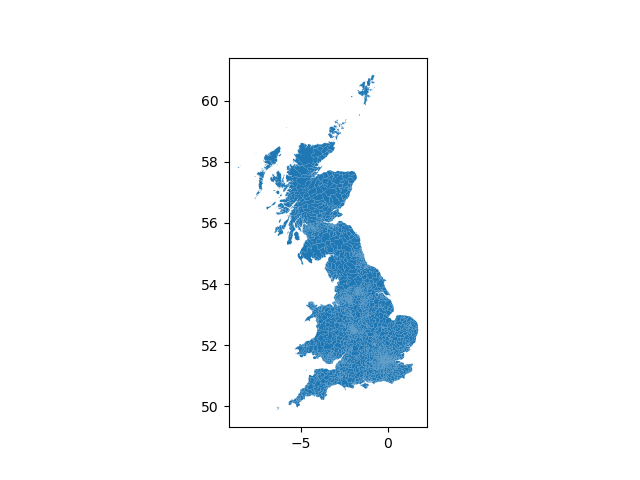

In [ ]:
#Load and check map of PostCode Districts
fp = "postcodes/Districts.shp"
map_df = gpd.read_file(fp)
map_df.plot()

In [ ]:
#Examine Header data of map
map_df.head()

,name,geometry
0,AB10,"POLYGON ((-2.11645 57.14656, -2.11655 57.14663..."
1,AB11,"MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57..."
2,AB12,"MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57..."
3,AB13,"POLYGON ((-2.26153 57.10694, -2.27015 57.11525..."
4,AB14,"POLYGON ((-2.26153 57.10694, -2.26315 57.10619..."


In [ ]:
#Aggregate postcodes with total containers for the year
aggregate_district = slice.groupby(["PC_District"])["Units"].sum().reset_index()
sorted_area = aggregate_district.sort_values(by = "Units", ascending = 0).head(20)
sorted_area['Unit_pct'] = sorted_area.Units / df.Units.sum()
sorted_area.style.format({
    'Unit_pct': '{:,.1%}'.format,
})

#TODO: Annualise & Give Monthly Average Units

,PC_District,Units,Unit_pct
113,M2,1191,13.1%
164,WF11,561,6.2%
89,L2,422,4.7%
131,OL16,393,4.3%
126,OL1,390,4.3%
101,LL11,387,4.3%
63,DN1,341,3.8%
108,LS1,317,3.5%
26,BL1,277,3.1%
134,PR2,248,2.7%


In [ ]:
reset_index = map_df.set_index("name")
merged = reset_index.join(aggregate_district.set_index("PC_District"))
merged["Units"] = merged["Units"].fillna(0)
merged

,geometry,Units
name,,
AB10,"POLYGON ((-2.11645 57.14656, -2.11655 57.14663...",0.0
AB11,"MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57...",0.0
AB12,"MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57...",0.0
AB13,"POLYGON ((-2.26153 57.10694, -2.27015 57.11525...",0.0
AB14,"POLYGON ((-2.26153 57.10694, -2.26315 57.10619...",0.0
...,...,...
YO90,"MULTIPOLYGON (((-1.08958 53.95931, -1.08891 53...",0.0
YO91,"POLYGON ((-1.06530 53.97796, -1.06634 53.97830...",0.0
ZE1,"MULTIPOLYGON (((-1.17282 60.12108, -1.18797 60...",0.0


<IPython.core.display.Javascript object>


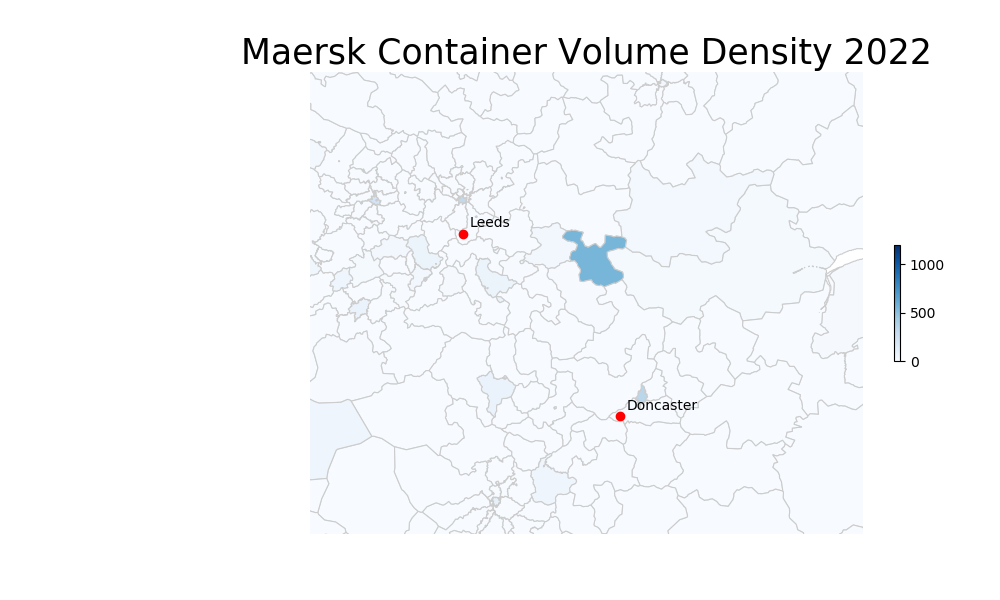

In [ ]:
variable = "Units"
vmin, vmax = 0, 1200
fig, ax = plt.subplots(1, figsize=(10, 6))

# add a title and remove axis
ax.set_title("Maersk Container Volume Density 2022", fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=0.0075, pad=0.04)


ax.annotate("Leeds", (indexed_fl_points.loc["Leeds"]["Long"], indexed_fl_points.loc["Leeds"]["Lat"]), xycoords='data', xytext=(5,5), textcoords="offset points")
ax.annotate("Doncaster", (indexed_fl_points.loc["Doncaster"]["Long"], indexed_fl_points.loc["Doncaster"]["Lat"]), xycoords='data', xytext=(5,5), textcoords="offset points")


merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
fl_points.plot(ax=ax, color="red")



# Postcode Area-level analysis (e.g., LN)

<IPython.core.display.Javascript object>


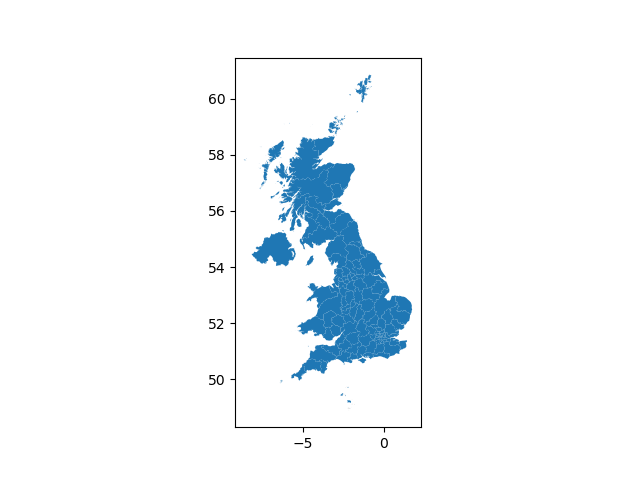

In [ ]:
#Load and check map of PostCode Districts
fp_areas = "postcodes/Areas.shp"
map_df_areas = gpd.read_file(fp_areas)
map_df_areas.plot()

In [ ]:
# Create Column with Postcode Area (one or two letters)
area_df = slice

In [ ]:
#Aggregate postcodes with total containers for the year
aggregate_area = area_df.groupby(["PC_Area"])["Units"].sum().reset_index()
aggregate_area

,PC_Area,Units
0,B,81
1,BB,216
2,BD,294
3,BL,277
4,CA,39
5,CH,153
6,CV,1
7,CW,237
8,DE,37
9,DH,24


In [ ]:
north_east=['LS','WF','S','HD', 'HG', 'HX', 'BD', 'DN', 'LN', 'NG', 'HU', 'YO', 'DL', 'TS', 'SR', 'DH', 'NE']
df3 = aggregate_area[aggregate_area.PC_Area.str.contains('|'.join(north_east))]
df3.sort_values(by='Units',ascending=False)


,PC_Area,Units
34,WF,822
11,DN,613
22,LS,323
2,BD,294
28,S,265
30,SR,210
29,SK,173
15,HU,154
24,NE,121
13,HD,105


In [ ]:
reset_index = map_df_areas.set_index("name")
merged_area = reset_index.join(aggregate_area.set_index("PC_Area"))
merged_area["Units"] = merged_area["Units"].fillna(0)
merged_area

,geometry,Units
name,,
AB,"POLYGON ((-2.21091 56.88580, -2.21858 56.88676...",0.0
AL,"POLYGON ((-0.37138 51.68730, -0.37227 51.68781...",0.0
B,"POLYGON ((-2.05436 52.24756, -2.05530 52.25006...",81.0
BA,"POLYGON ((-2.08430 51.31717, -2.08008 51.31421...",0.0
BB,"POLYGON ((-2.21557 53.73160, -2.21541 53.73145...",216.0
...,...,...
ZE,"MULTIPOLYGON (((-0.80210 60.40932, -0.80233 60...",0.0
BT,"MULTIPOLYGON (((-5.54258 54.29000, -5.54922 54...",0.0
GY,"MULTIPOLYGON (((-2.36625 49.40170, -2.36750 49...",0.0


In [ ]:
nomi = pgeocode.Nominatim('GB')
nomi.query_postal_code("S9 1")

postal_code                                S9
country_code                               GB
place_name        Tinsley, Darnall, Wincobank
state_name                            England
state_code                                ENG
county_name                   South Yorkshire
county_code                           2637273
community_name                            NaN
community_code                            NaN
latitude                              53.4099
longitude                            -1.40847
accuracy                                    4
Name: 0, dtype: object

<IPython.core.display.Javascript object>


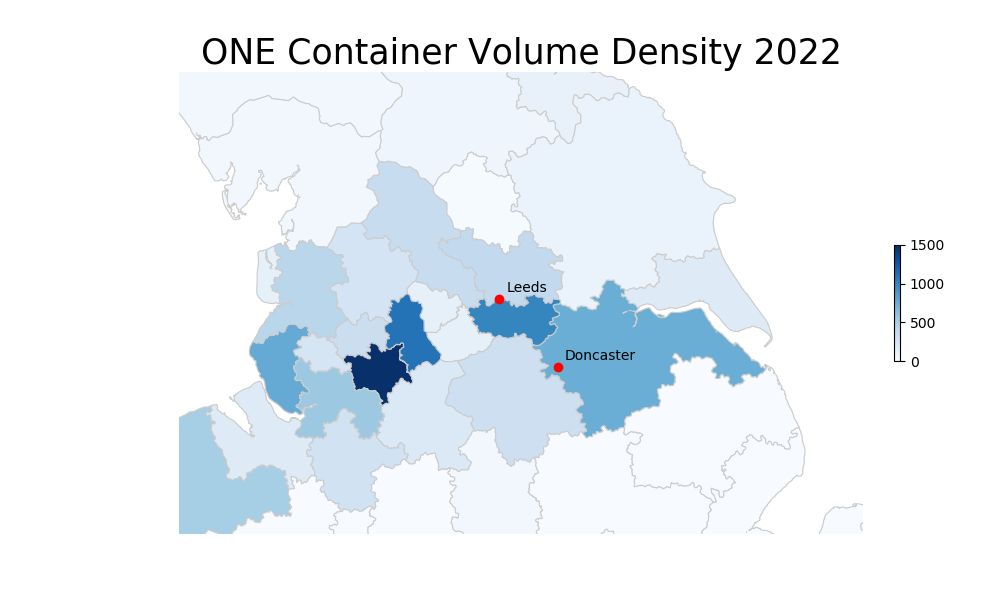

In [ ]:
fig_com, ax_com = plt.subplots(1, figsize=(10, 6))
ax_com.axis('off')
vmin_area, vmax_area = 0, 1500

# add a title
ax_com.set_title("ONE Container Volume Density 2022", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin_area, vmax=vmax_area))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig_com.colorbar(sm, fraction=0.0075, pad=0.04)

ax_com.annotate("Leeds", (indexed_fl_points.loc["Leeds"]["Long"], indexed_fl_points.loc["Leeds"]["Lat"]), xycoords='data', xytext=(5,5), textcoords="offset points")
ax_com.annotate("Doncaster", (indexed_fl_points.loc["Doncaster"]["Long"], indexed_fl_points.loc["Doncaster"]["Lat"]), xycoords='data', xytext=(5,5), textcoords="offset points")

merged_area.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax_com, edgecolor='0.8') 
fl_points.plot(ax=ax_com, color="red")